In [1]:
# Are there notable seasonal patterns (by quarter) in airfares or passenger numbers? 
# How do prices and demand change throughout the year? 

In [2]:
import hvplot.pandas
import pandas as pd
from matplotlib import pyplot as plt

import requests
import json
import numpy as np
import pandas as pd

# Import the API key
from config import geoapify_key

In [3]:
multicity_df = pd.read_csv("../Resources/Clean_Multi_City_Airport_Markets.csv")
print(multicity_df.columns)
multicity_df.head()

Index(['tbl', 'Year', 'quarter', 'citymarketid_Dept', 'citymarketid_Arriv',
       'Departure_city', 'Arrival_city', 'Airportid_Departure',
       'Airportid_Arrival', 'D_airport_code', 'A_airport_code',
       'Non_stop_Miles', 'passengers', 'fare', 'carrier_lg', 'large_ms',
       'fare_lg', 'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_Departure',
       'Geocoded_Arrival', 'tbl1apk'],
      dtype='object')


,tbl,Year,quarter,citymarketid_Dept,citymarketid_Arriv,Departure_city,Arrival_city,Airportid_Departure,Airportid_Arrival,D_airport_code,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_Departure,Geocoded_Arrival,tbl1apk
0,Table1a,2018,4,32575,33195,"Los Angeles, CA (Metropolitan Area)","Tampa, FL (Metropolitan Area)",12892,15304,LAX,...,296.07,DL,0.3715,368.40,WN,0.3380,241.02,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289215304LAXTPA
1,Table1a,2018,4,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",12892,14747,LAX,...,177.68,AS,0.5631,169.76,AS,0.5631,169.76,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289214747LAXSEA
2,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,12264,LAX,...,310.32,UA,0.5517,357.82,AS,0.2095,226.80,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289212264LAXIAD
3,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,11278,LAX,...,305.38,AA,0.4535,321.18,AS,0.2020,260.36,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289211278LAXDCA
4,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,10821,LAX,...,221.51,WN,0.4442,242.89,NK,0.1541,123.65,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289210821LAXBWI


In [4]:
arrival_cities = ["Washington, DC (Metropolitan Area)", "Tampa, FL (Metropolitan Area)",
                    "Seattle, WA"]
departure_city = "Los Angeles, CA (Metropolitan Area)"
#city_of_interest=[]
filtered_df = multicity_df.loc[
    (multicity_df["Departure_city"] == departure_city) &
     ( multicity_df["Arrival_city"].isin(arrival_cities))]
filtered_df.head()
                               

,tbl,Year,quarter,citymarketid_Dept,citymarketid_Arriv,Departure_city,Arrival_city,Airportid_Departure,Airportid_Arrival,D_airport_code,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_Departure,Geocoded_Arrival,tbl1apk
0,Table1a,2018,4,32575,33195,"Los Angeles, CA (Metropolitan Area)","Tampa, FL (Metropolitan Area)",12892,15304,LAX,...,296.07,DL,0.3715,368.40,WN,0.3380,241.02,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289215304LAXTPA
1,Table1a,2018,4,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",12892,14747,LAX,...,177.68,AS,0.5631,169.76,AS,0.5631,169.76,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289214747LAXSEA
2,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,12264,LAX,...,310.32,UA,0.5517,357.82,AS,0.2095,226.80,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289212264LAXIAD
3,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,11278,LAX,...,305.38,AA,0.4535,321.18,AS,0.2020,260.36,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289211278LAXDCA
4,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,10821,LAX,...,221.51,WN,0.4442,242.89,NK,0.1541,123.65,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289210821LAXBWI


In [5]:
groupby_df = filtered_df.groupby(["Year","Arrival_city","quarter"]).aggregate({'Non_stop_Miles':'mean',
                                                          'fare':'mean',
                                                          'passengers':'mean'}
                                                               )
groupby_df["avg fare per mile"] =  groupby_df["fare"] / groupby_df["Non_stop_Miles"]
groupby_df

Non_stop_Miles        fare  \
Year Arrival_city                       quarter                               
2017 Seattle, WA                        1                 978.0  137.028000   
                                        2                 978.0  154.608000   
                                        3                 978.0  156.102000   
                                        4                 978.0  158.476000   
     Tampa, FL (Metropolitan Area)      1                2158.0  323.734000   
                                        2                2158.0  323.242000   
                                        3                2158.0  301.174000   
                                        4                2158.0  317.488000   
     Washington, DC (Metropolitan Area) 1                2329.0  308.149333   
                                        2                2329.0  323.470667   
                                        3                2329.0  294.114000   
                                        4                2329.0  292.984000   
2018 Seattle, WA                        1                 978.0  153.390000   
                                        2                 978.0  163.714000   
                                        3                 978.0  177.584000   
                                        4                 978.0  180.108000   
     Tampa, FL (Metropolitan Area)      1                2158.0  318.826000   
                                        2                2158.0  303.154000   
                                        3                2158.0  280.390000   
                                        4                2158.0  310.062000   
     Washington, DC (Metropolitan Area) 1                2329.0  292.772000   
                                        2                2329.0  314.464667   
                                        3                2329.0  295.282667   
                                        4                2329.0  304.382000   

                                                  passengers  \
Year Arrival_city                       quarter                
2017 Seattle, WA                        1        1485.800000   
                                        2        1792.000000   
                                        3        1883.600000   
                                        4        1619.200000   
     Tampa, FL (Metropolitan Area)      1         156.600000   
                                        2         160.800000   
                                        3         145.600000   
                                        4         171.400000   
     Washington, DC (Metropolitan Area) 1         320.066667   
                                        2         414.133333   
                                        3         382.466667   
                                        4         370.866667   
2018 Seattle, WA                        1        1448.000000   
                                        2        1853.800000   
                                        3        1850.400000   
                                        4        1648.800000   
     Tampa, FL (Metropolitan Area)      1         173.600000   
                                        2         194.400000   
                                        3         194.800000   
                                        4         203.400000   
     Washington, DC (Metropolitan Area) 1         325.866667   
                                        2         409.200000   
                                        3         387.800000   
                                        4         383.400000   

                                                 avg fare per mile  
Year Arrival_city                       quarter                     
2017 Seattle, WA                        1                 0.140110  
                                        2                 0.158086  
                                        3            

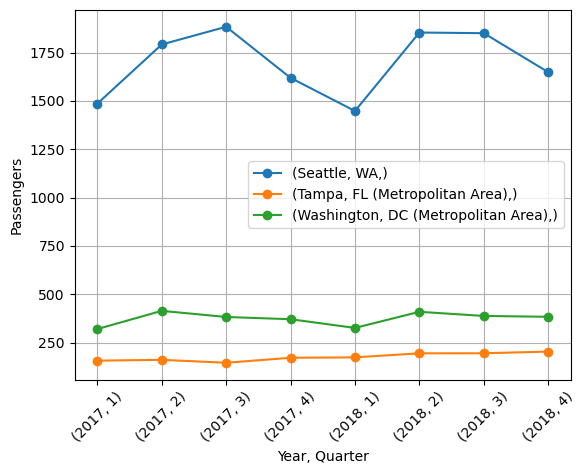

<Figure size 640x480 with 0 Axes>

In [6]:
fig, ax = plt.subplots()

for key, grp in groupby_df.groupby(['Arrival_city']):
    l = np.arange(len(grp))
    ax = grp.plot(ax=ax, kind='line',y='passengers', xlabel="Year, Quarter", 
                  ylabel="Passengers", label=key, marker='o',grid=True)

xlabels = [ "(2017, 1)", "(2017, 2)", "(2017, 3)", "(2017, 4)",
            "(2018, 1)", "(2018, 2)", "(2018, 3)", "(2018, 4)"]

plt.xticks(l, list(xlabels), rotation=45)
plt.legend(loc='best')
plt.savefig("../output/Passengers-per-quarter.png")
plt.show()
plt.tight_layout()
#plt.savefig("Passengers-per-quarter.png")

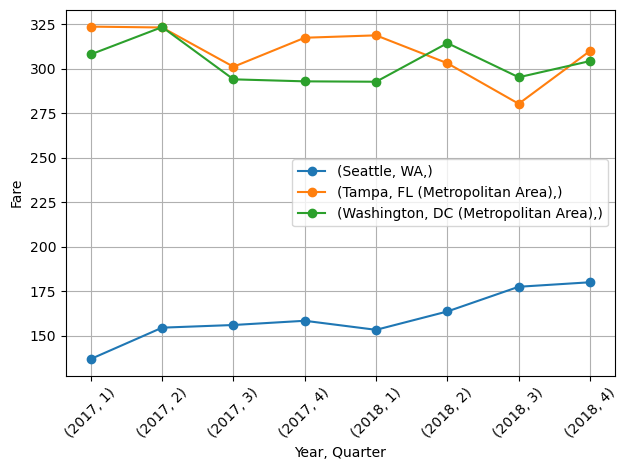

<Figure size 640x480 with 0 Axes>

In [7]:
fig, ax = plt.subplots()

for key, grp in groupby_df.groupby(['Arrival_city']):
    l = np.arange(len(grp))
    ax = grp.plot(ax=ax, kind='line',y='fare', xlabel="Year, Quarter", ylabel="Fare",
                  label=key, marker='o',grid=True)


xlabels = ["(2017, 1)", "(2017, 2)", "(2017, 3)", "(2017, 4)",
           "(2018, 1)", "(2018, 2)", "(2018, 3)", "(2018, 4)"]

plt.xticks(l, list(xlabels), rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("../output/Fare-per-quarter.png")
plt.show()
plt.tight_layout()

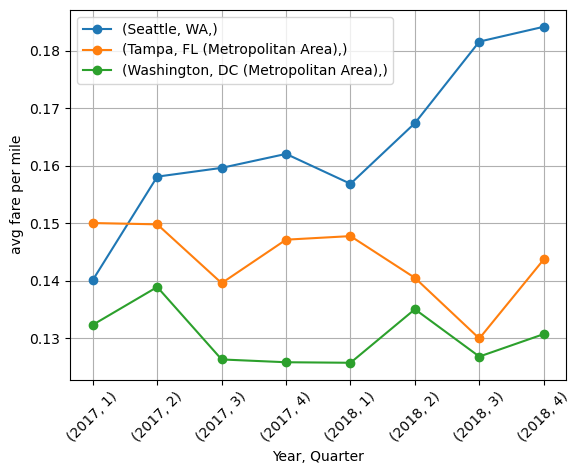

In [8]:
fig, ax = plt.subplots()

for key, grp in groupby_df.groupby(['Arrival_city']):
    l = np.arange(len(grp))
    ax = grp.plot(ax=ax, kind='line',y='avg fare per mile', xlabel="Year, Quarter", 
                  ylabel="avg fare per mile",
                  label=key, marker='o',grid=True)


xlabels = ["(2017, 1)", "(2017, 2)", "(2017, 3)", "(2017, 4)",
           "(2018, 1)", "(2018, 2)", "(2018, 3)", "(2018, 4)"]

plt.xticks(l, list(xlabels), rotation=45)
plt.legend(loc='best')
plt.savefig("../output/Avg-Fare-Per-Mile.png")
plt.show()

In [9]:
df = pd.DataFrame(filtered_df["Arrival_city"].value_counts())
print(df)

                                    count
Arrival_city                             
Washington, DC (Metropolitan Area)    120
Tampa, FL (Metropolitan Area)          40
Seattle, WA                            40


In [10]:
df["avg fare"]          =  filtered_df.groupby("Arrival_city")["fare"].mean()
df["avg distance"]      =  filtered_df.groupby("Arrival_city")["Non_stop_Miles"].mean()
df["avg fare per mile"] =  df["avg fare"] / df["avg distance"]
df["Lat"] = 0.0
df["Lng"] = 0.0
df


,count,avg fare,avg distance,avg fare per mile,Lat,Lng
Arrival_city,,,,,,
"Washington, DC (Metropolitan Area)",120,303.202417,2329.0,0.130186,0.0,0.0
"Tampa, FL (Metropolitan Area)",40,309.758750,2158.0,0.143540,0.0,0.0
"Seattle, WA",40,160.126250,978.0,0.163728,0.0,0.0


In [11]:
# Get latitute/longitude for all the arrival cities
for city in arrival_cities:
    # Target city
    target_url = f"https://api.geoapify.com/v1/geocode/search?text={city}&format=json&apiKey={geoapify_key}"    
    geo_data = requests.get(target_url).json()
    lat = geo_data["results"][0]["lat"]
    lon = geo_data["results"][0]["lon"]
    df.loc[city, "Lat"] = lat
    df.loc[city, "Lng"] = lon
# Build the endpoint URL


df


,count,avg fare,avg distance,avg fare per mile,Lat,Lng
Arrival_city,,,,,,
"Washington, DC (Metropolitan Area)",120,303.202417,2329.0,0.130186,38.826520,-77.017120
"Tampa, FL (Metropolitan Area)",40,309.758750,2158.0,0.143540,27.935231,-82.495716
"Seattle, WA",40,160.126250,978.0,0.163728,47.603832,-122.330062


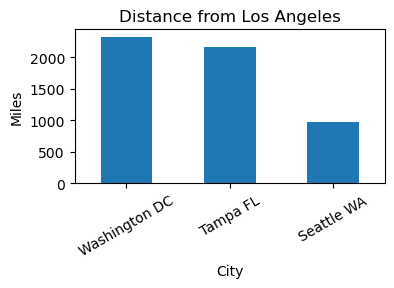

In [12]:
df["avg distance"].plot.bar(title="Distance from Los Angeles", ylabel="Miles", 
                            xlabel="City", figsize=(4,2))
plt.xticks([0,1,2], ["Washington DC", "Tampa FL", "Seattle WA"],rotation=30)
plt.savefig("../output/City-Distance.png")

In [14]:
# departure city to df so it can be plotted in the map
city= departure_city
target_url = f"https://api.geoapify.com/v1/geocode/search?text={city}&format=json&apiKey={geoapify_key}"    
geo_data = requests.get(target_url).json()
lat = geo_data["results"][0]["lat"]
lon = geo_data["results"][0]["lon"]
df.loc[city, "Lat"] = lat
df.loc[city, "Lng"] = lon
df.loc[city, "avg distance"] = 10

# add index as column to hvplot.labels can use it for text
df['City'] = df.index

# plot the points
map_plot_1 = df[["avg distance","Lat","Lng","City"]].hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 500,
    frame_height = 330,
    size = "avg distance",
    padding=0.5,
    scale = 0.5,
    hover_cols=['avg distance', 'City']
)
#plot city name as labels
map_plot_2 = df[["avg distance", "Lat", "Lng","City"]].hvplot.labels(
    x='Lng', y='Lat', text='City', text_baseline='bottom', 
    hover=False, project=True, geo=True, 
    tiles = "OSM",
    padding=0.5,
    fontsize=0.5,
    frame_width = 500,
    frame_height = 330)

#plot distance as labels
map_plot_3 = df[["avg distance", "Lat", "Lng","City"]].hvplot.labels(
    x='Lng', y='Lat', text='{avg distance} miles', text_baseline='top', 
    hover=False, project=True, geo=True, 
    tiles = "OSM",
    padding=0.5,
    fontsize=0.5,
    frame_width = 500,
    frame_height = 330)
# use * overlap the plots
hvplot.save(map_plot_1 * map_plot_2 * map_plot_3, "../output/distancemap.html")
map_plot_1 * map_plot_2 * map_plot_3


#hvplot.save(map_plot_2 * map_plot_1, 'distancemap.png', fmt='png')

/usr/local/anaconda3/envs/dev/lib/python3.10/site-packages/hvplot/converter.py:2123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["label"] = data.apply(lambda row: template_str.format(**row), axis=1)


:Overlay
   .WMTS.I    :WMTS   [Longitude,Latitude]
   .Points.I  :Points   [Lng,Lat]   (avg distance,City)
   .WMTS.II   :WMTS   [Longitude,Latitude]
   .Labels.I  :Labels   [Lng,Lat]   (City)
   .WMTS.III  :WMTS   [Longitude,Latitude]
   .Labels.II :Labels   [Lng,Lat]   (label)